<a href="https://colab.research.google.com/github/Ayobami6/ProjectCollaboration.github.io/blob/corrections/Loan_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

Project Objectives

In [1]:
import MultiTrain

## Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting the all the to 2 decimal places
# pd.set_option("precision", 2)
# pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Reading in the dataset from google sheet with the sheet id 
url_id = '1v7qBibZ-yO2CgGNZsUvJKoXeU8ppcA5j_XH9SoiwP5Q'
df_data_1 = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{url_id}/export?format=csv')

In [5]:
df_data_1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


# Data Cleaning

In [6]:
df_data_1.shape

(100000, 19)

Data Cleaning:
Dealing with missing values 

In [7]:
m_v = df_data_1.isnull().sum()

In [8]:
m_v

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [9]:
# Checkimg the total number of nulls in the dataset
m_v.sum()

95887

In [10]:
n_n = df_data_1.notnull().sum()

In [11]:
n_n

Loan ID                         100000
Customer ID                     100000
Loan Status                     100000
Current Loan Amount             100000
Term                            100000
Credit Score                     80846
Annual Income                    80846
Years in current job             95778
Home Ownership                  100000
Purpose                         100000
Monthly Debt                    100000
Years of Credit History         100000
Months since last delinquent     46859
Number of Open Accounts         100000
Number of Credit Problems       100000
Current Credit Balance          100000
Maximum Open Credit              99998
Bankruptcies                     99796
Tax Liens                        99990
dtype: int64

In [12]:
# Checking for non nulls in the dataset
n_n.sum()

1804113

In [13]:
df_data_1.drop('Months since last delinquent', axis=1, inplace=True)

In [14]:
df_data_1.isnull().any()

Loan ID                      False
Customer ID                  False
Loan Status                  False
Current Loan Amount          False
Term                         False
Credit Score                  True
Annual Income                 True
Years in current job          True
Home Ownership               False
Purpose                      False
Monthly Debt                 False
Years of Credit History      False
Number of Open Accounts      False
Number of Credit Problems    False
Current Credit Balance       False
Maximum Open Credit           True
Bankruptcies                  True
Tax Liens                     True
dtype: bool

In [15]:
df_data_1.dtypes

Loan ID                       object
Customer ID                   object
Loan Status                   object
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [16]:
Average_Credit_score = round(df_data_1['Credit Score'].mean(), 2)

In [17]:
Average_Credit_score

1076.46

In [18]:
df_data_1['Credit Score'].fillna(Average_Credit_score, inplace=True)

In [19]:
df_data_1.isnull().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                     0
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [20]:
# Creating an automation code to fill the null values for columns with float datatypes with their corresponding mean
for i in df_data_1.columns:
    if df_data_1[i].isnull().any()==True and df_data_1[i].dtypes=='float64':
        df_data_1[i].fillna(df_data_1[i].mean(), inplace=True)
        

In [21]:
df_data_1.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         4222
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [22]:
# Creating an automation code to fill the null values for columns with object datatypes with their corresponding mode
for i in df_data_1.columns:
    if df_data_1[i].isnull().any()==True and df_data_1[i].dtypes=='object':
        df_data_1[i].fillna(df_data_1[i].mode()[0], inplace=True)

In [23]:
# Checking for nulls in the dataset
df_data_1.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [24]:
df_data_1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,1076.46,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,1076.46,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [25]:
# Getting a peap at the summary statistics of the dataset
df_data_1.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,1.176045e+07,1076.456838,1.378277e+06,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1326.598950,9.722974e+05,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384420e+06,0.351065,0.258170
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,711.000000,9.311805e+05,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,733.000000,1.369919e+06,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678850e+05,0.000000,0.000000
75%,5.249420e+05,750.000000,1.512704e+06,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Data Visualization for more insights on the data

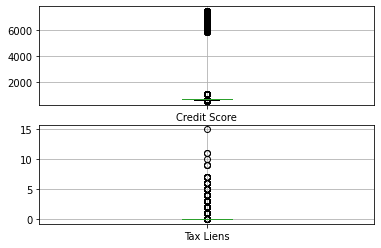

<Figure size 720x288 with 0 Axes>

In [26]:
fig, axes = plt.subplots(2, 1)
plt.figure(figsize=(10,4))
df_data_1.boxplot(column='Credit Score', ax=axes[0])
df_data_1.boxplot(column='Tax Liens', ax=axes[1]);

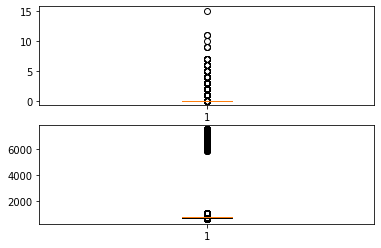

<Figure size 1080x720 with 0 Axes>

In [27]:
fig, ax = plt.subplots(2, 1)
plt.figure(figsize=(15, 10))
ax[0].boxplot(df_data_1['Tax Liens'])
ax[1].boxplot(df_data_1['Credit Score']);
plt.show()

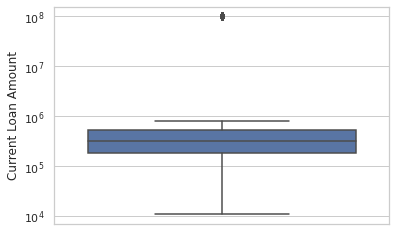

In [28]:
sns.set(style='whitegrid')
ax =sns.boxplot(y=df_data_1['Current Loan Amount'])
ax.set_yscale('log');

In [29]:
# Checking the credit score is greater that 750 
print(np.where(df_data_1['Credit Score'] > 750))

(array([    1,     4,     5, ..., 99988, 99989, 99992]),)


Text(0.5, 0, 'Credit Score')

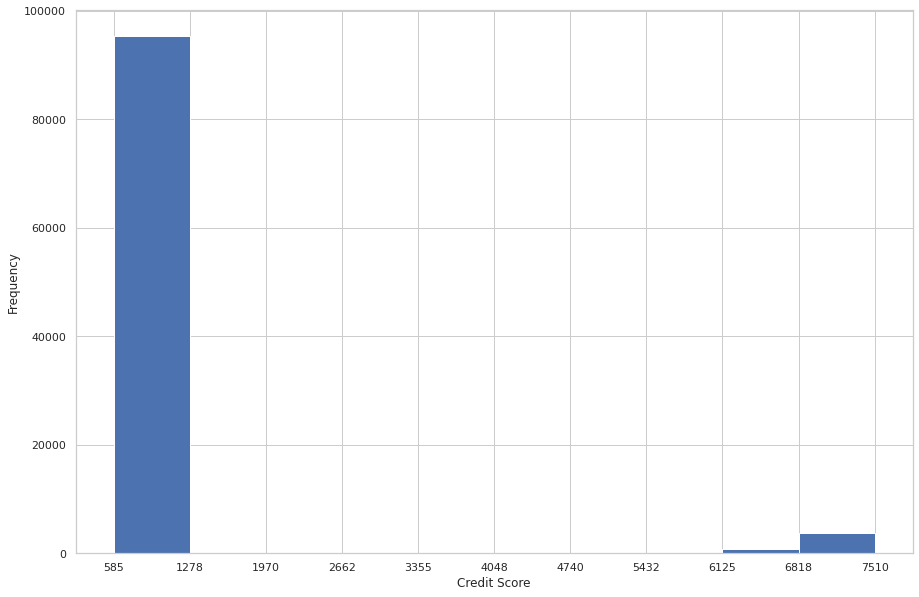

In [30]:
plt.figure(figsize=(15,10))
# plt.subplot(1, 2, 1)
# binsize = 1000000
count, bin_edges = np.histogram(df_data_1['Credit Score'])
df_data_1['Credit Score'].plot(kind='hist', xticks=bin_edges,
                   bins=10);
# plt.xscale('log')
plt.xlabel('Credit Score')

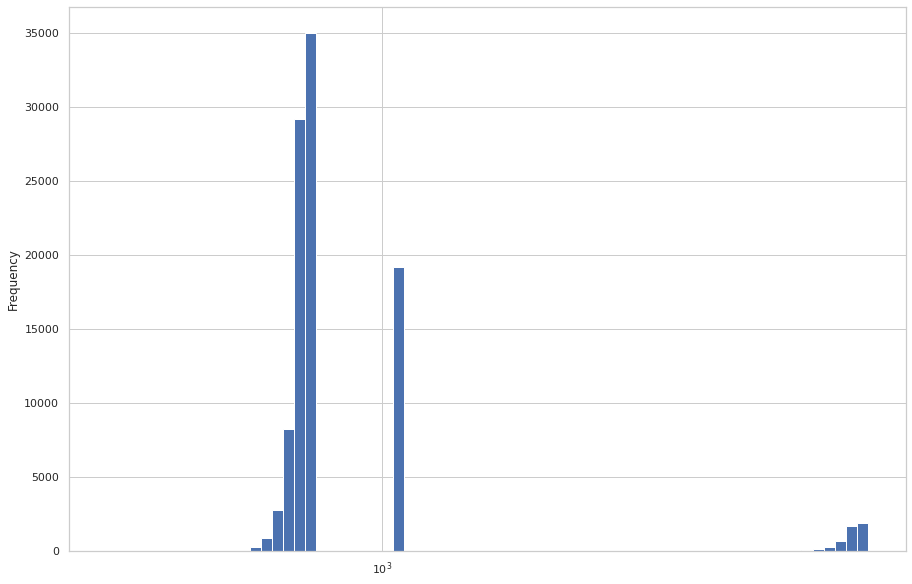

In [31]:
plt.figure(figsize=(15,10))
log_binsize = 0.020
bins = 10 ** np.arange(2.5, np.log10(df_data_1['Credit Score'].max())+log_binsize, log_binsize) # logging the max data point and adding the log binsize
count, bin_edges = np.histogram(df_data_1['Credit Score'])
df_data_1['Credit Score'].plot(kind='hist',
                   bins=bins);
plt.xscale('log')

In [32]:
df_data_1.drop('Tax Liens', axis='columns', inplace=True)
    

In [33]:
df_data_1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,1076.46,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,1076.46,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0


In [34]:
# Defining function for the top five rows of the dataset.
def top5_rows(data):
    return data.head()

In [35]:
# Defining function for the last 5 rows of the dataset
def last5_rows(data):
    return data.tail()

In [36]:
last5_rows(df_data_1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5,0,47766,658548.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22,0,153045,509234.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12,1,109554,537548.0,1.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8,0,404225,738254.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999,Short Term,743.0,935180.0,10+ years,Own Home,Debt Consolidation,9118.10,13.0,4,1,45600,91014.0,1.0


In [37]:
# Converting the years of credit column data type to integer
df_data_1['Years of Credit History'] =df_data_1['Years of Credit History'].astype(int)

In [38]:
df_data_1.dtypes

Loan ID                       object
Customer ID                   object
Loan Status                   object
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History        int64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Bankruptcies                 float64
dtype: object

In [39]:
top5_rows(df_data_1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17,6,1,228190,416746.0,1.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,1076.46,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21,35,0,229976,850784.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14,18,1,297996,750090.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12,9,0,256329,386958.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,1076.46,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6,15,0,253460,427174.0,0.0


In [40]:
# Dropping the Bankruptcies column in the dataset.
df_data_1.drop('Bankruptcies', axis='columns', inplace=True)

In [41]:
top5_rows(df_data_1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17,6,1,228190,416746.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,1076.46,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21,35,0,229976,850784.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14,18,1,297996,750090.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12,9,0,256329,386958.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,1076.46,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6,15,0,253460,427174.0


In [42]:
df_data_1[['Number of Open Accounts', 'Number of Credit Problems']] = df_data_1[['Number of Open Accounts', 'Number of Credit Problems']].astype(int)

In [43]:
df_data_1.dtypes

Loan ID                       object
Customer ID                   object
Loan Status                   object
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History        int64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
dtype: object

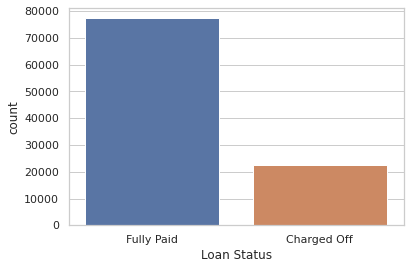

In [44]:
# Visualizing the Loan status count 
sns.countplot(data=df_data_1, x = 'Loan Status');

From the viz result we can see that most of the client fully paid their loan, however we don't know the patterns or features in the datasets if there is any that might likely influenced the loan status,

In [45]:
df_data_1['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [46]:
# Dropping the Loan ID column from the datasets
df_data_1.drop('Loan ID', axis='columns', inplace=True)

In [47]:
top5_rows(df_data_1)

,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17,6,1,228190,416746.0
1,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,1076.46,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21,35,0,229976,850784.0
2,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14,18,1,297996,750090.0
3,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12,9,0,256329,386958.0
4,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,1076.46,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6,15,0,253460,427174.0


In [48]:
df_data_1.drop('Customer ID', axis='columns', inplace=True)

In [49]:
cor = df_data_1.corr()
cor

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
Current Loan Amount,1.000000,-0.095153,0.012909,-0.006643,0.019239,0.001478,-0.002795,0.003880,-0.001271
Credit Score,-0.095153,1.000000,-0.017078,-0.001512,-0.008609,0.005808,-0.002746,-0.000095,-0.002088
Annual Income,0.012909,-0.017078,1.000000,0.438402,0.145313,0.131936,-0.015453,0.284947,0.039205
Monthly Debt,-0.006643,-0.001512,0.438402,1.000000,0.199173,0.411353,-0.055383,0.481348,0.039267
Years of Credit History,0.019239,-0.008609,0.145313,0.199173,1.000000,0.131830,0.061600,0.208521,0.030813
Number of Open Accounts,0.001478,0.005808,0.131936,0.411353,0.131830,1.000000,-0.013995,0.228136,0.031341
Number of Credit Problems,-0.002795,-0.002746,-0.015453,-0.055383,0.061600,-0.013995,1.000000,-0.112516,-0.012072
Current Credit Balance,0.003880,-0.000095,0.284947,0.481348,0.208521,0.228136,-0.112516,1.000000,0.139203
Maximum Open Credit,-0.001271,-0.002088,0.039205,0.039267,0.030813,0.031341,-0.012072,0.139203,1.000000


<AxesSubplot:>

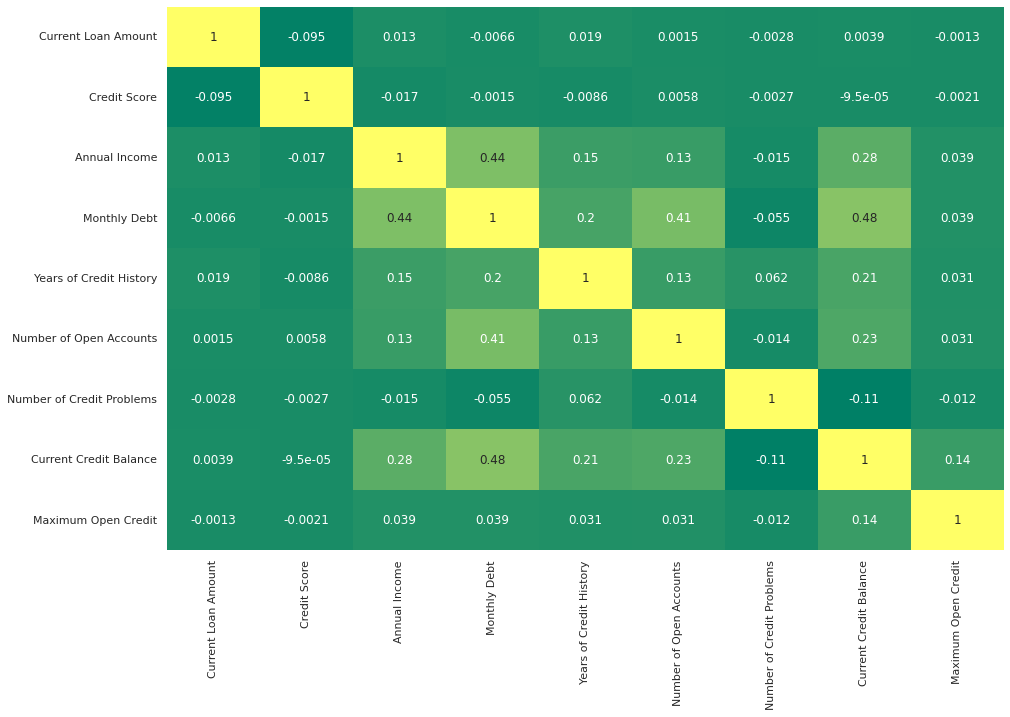

In [50]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(cor, annot = True, cbar = False, cmap = 'summer')
heatmap

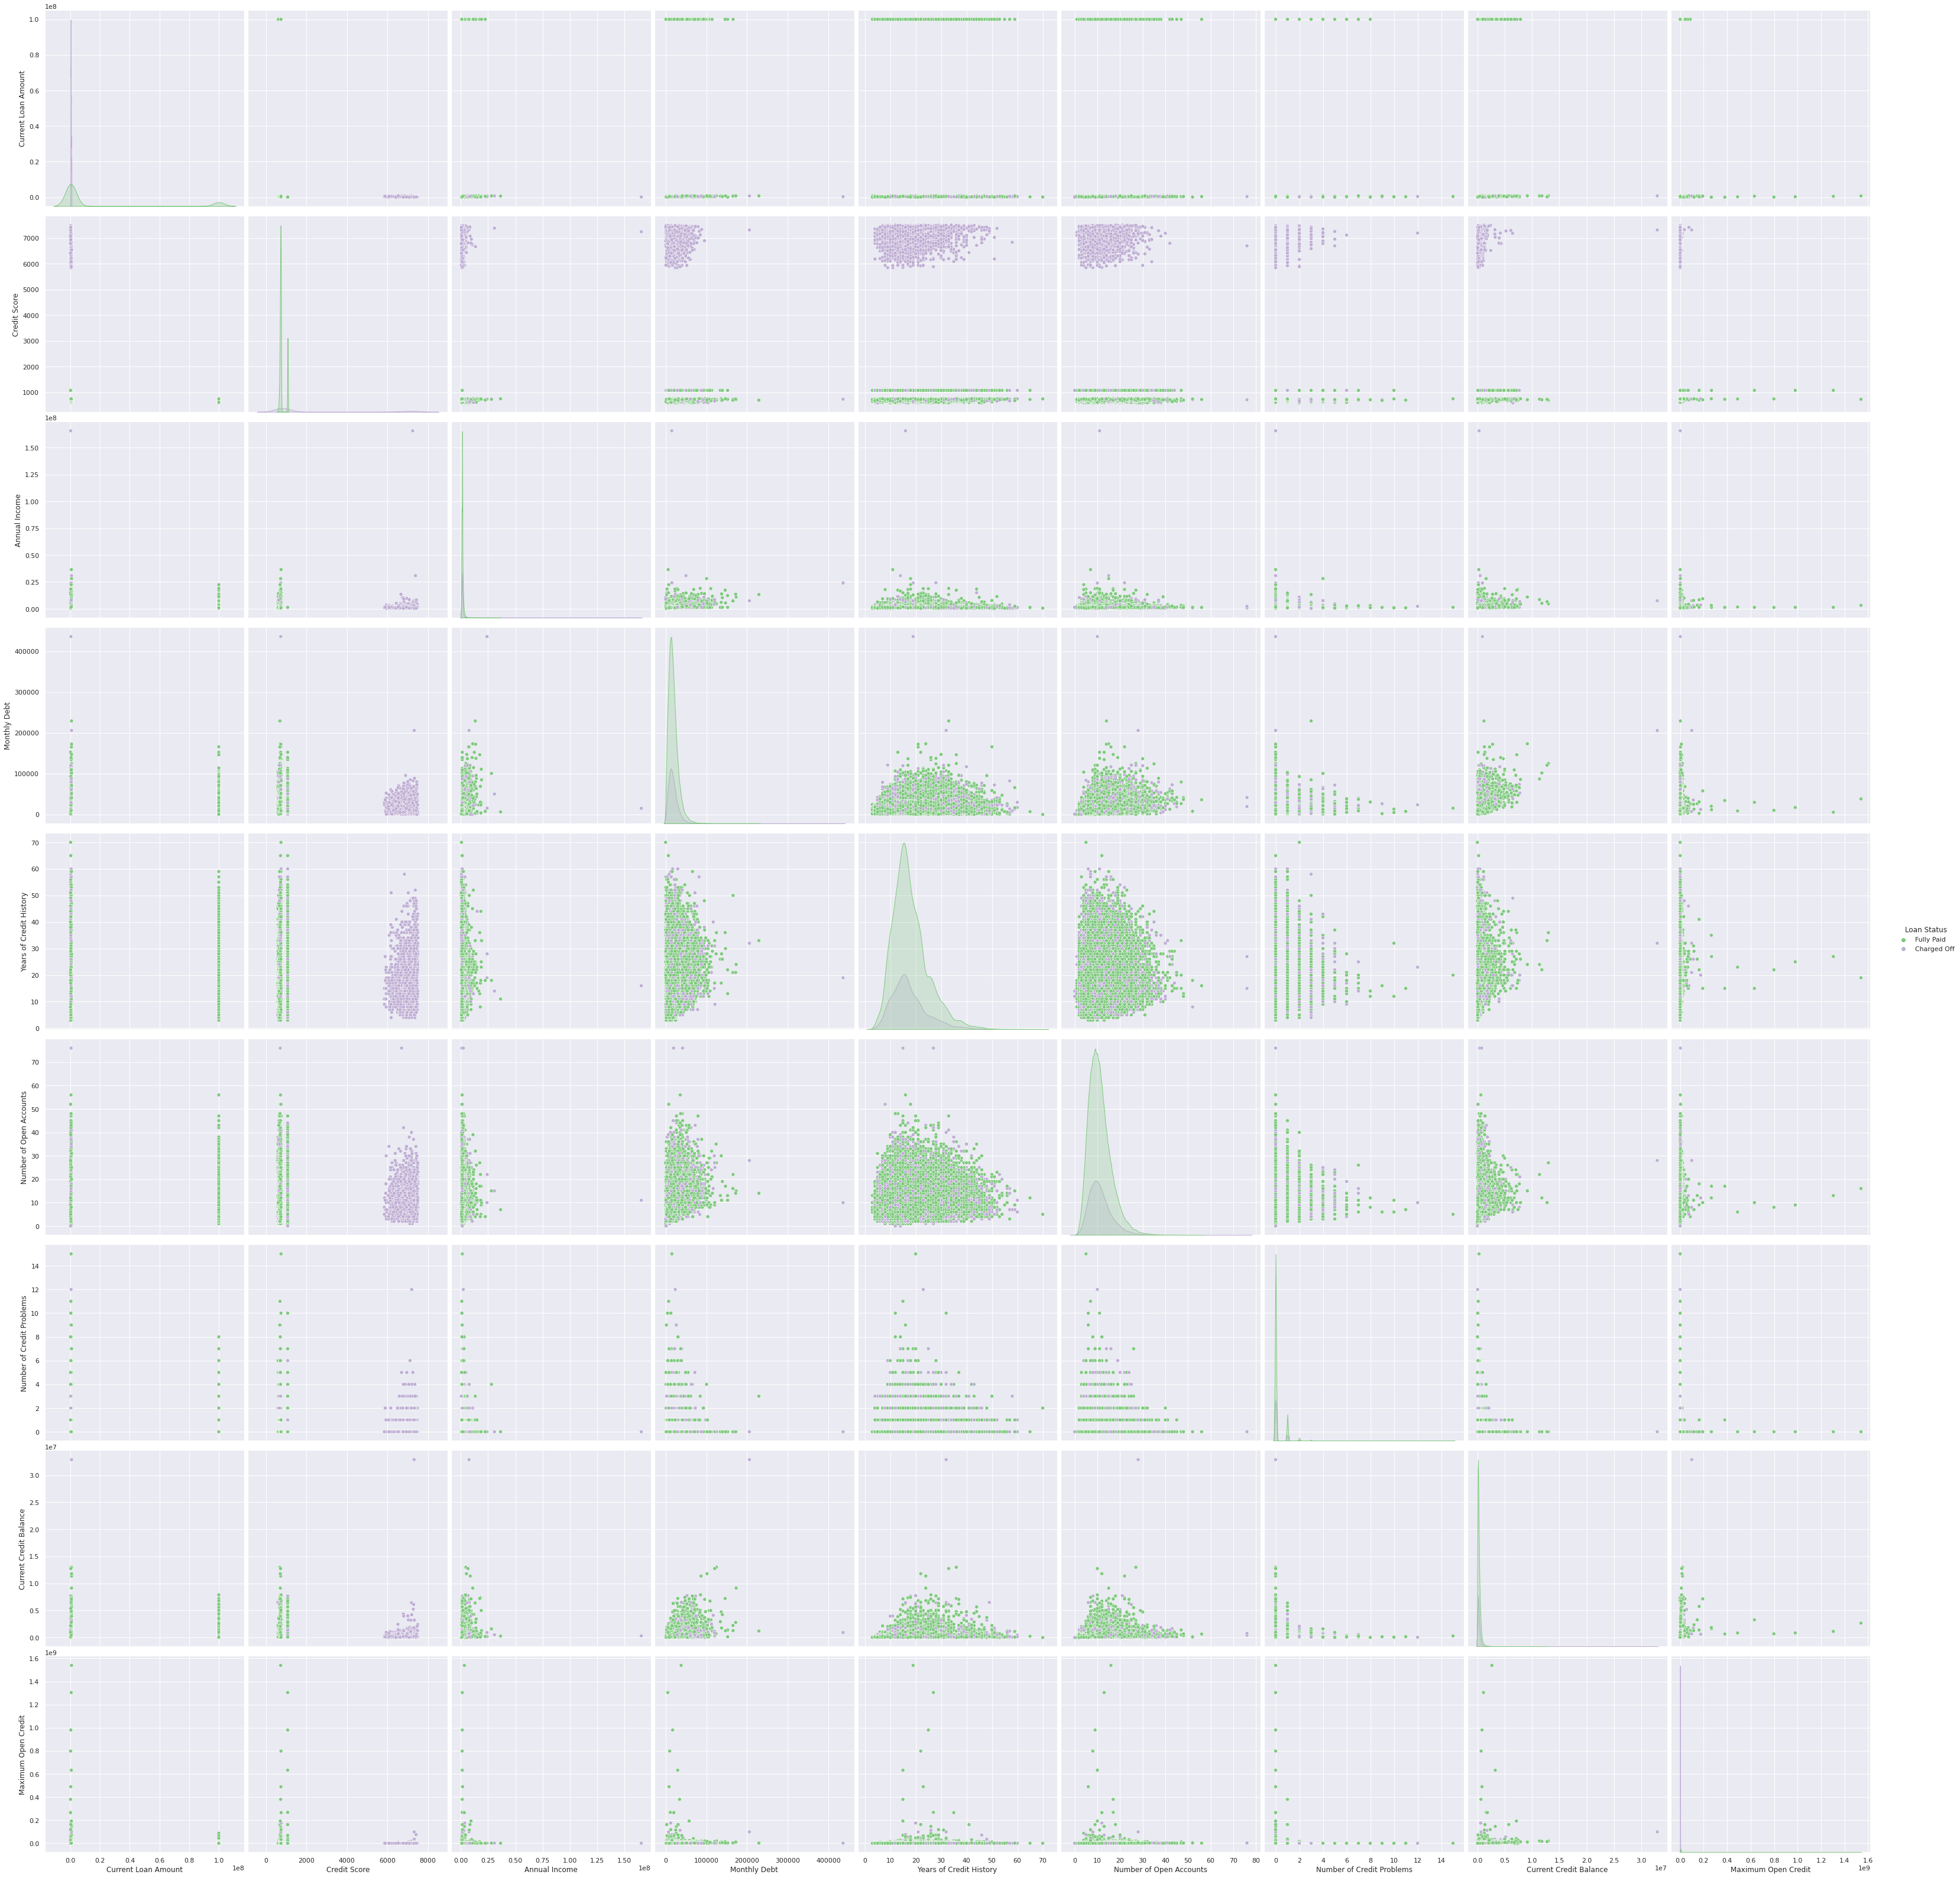

In [51]:
sns.set_style('darkgrid')
sns.set_palette('Accent')
sns.pairplot(df_data_1, hue='Loan Status', height=5.0)

In [52]:
# Checking the counts of the different loans 
df_data_1['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

Splitting the dataset

In [53]:
X = df_data_1.drop('Loan Status', axis=1)
y = df_data_1['Loan Status']

In [54]:
map_format = {'Charged Off':0, 'Fully Paid': 1}
y = y.map(map_format)

In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan Status, dtype: int64

In [56]:
print(y.shape)

(100000,)


In [57]:
y.value_counts()

1    77361
0    22639
Name: Loan Status, dtype: int64

In [58]:
top5_rows(X)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,445412,Short Term,709.00,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17,6,1,228190,416746.0
1,262328,Short Term,1076.46,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21,35,0,229976,850784.0
2,99999999,Short Term,741.00,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14,18,1,297996,750090.0
3,347666,Long Term,721.00,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12,9,0,256329,386958.0
4,176220,Short Term,1076.46,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6,15,0,253460,427174.0


In [59]:
X.drop(columns = ['Years in current job', 'Term', 'Home Ownership', 'Purpose'], inplace=True)

## **One Hot Encoding** 

In [60]:
# getting the new X data columns
X.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit'],
      dtype='object')

In [61]:
X.shape

(100000, 9)

In [62]:
# Checking the top 5 rows of the new X dataset
top5_rows(y)

0    1
1    1
2    1
3    1
4    1
Name: Loan Status, dtype: int64

## Model Building

In [63]:
# importing the model library for training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Creating the model variables using the test slpit functions and the hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 32)
#36 81.9% 0.15
#32 82.07% 0.15

In [64]:
import sklearn

In [65]:
sklearn.__version__

'1.1.2'

In [66]:
# Modelling, predicting and evaluating
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000) 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'accuracy score is : ',  str(round(accuracy_test * 100, 2)) + '%')

accuracy score is :  82.07%


In [67]:
from MultiTrain import MultiClassifier
train = MultiClassifier()
print(train.classifier_model_names())


['Logistic Regression', 'LogisticRegressionCV', 'SGDClassifier', 'PassiveAggressiveClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'AdaBoostClassifier', 'CatBoostClassifier', 'XGBClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis', 'KNeighborsClassifier', 'MLPClassifier', 'SVC', 'DecisionTreeClassifier', 'BernoulliNB', 'MultinomialNB', 'ComplementNB', 'ExtraTreesClassifier', 'RidgeClassifier', 'RidgeClassifierCV', 'ExtraTreeClassifier', 'QuadraticDiscriminantAnalysis', 'LinearSVC', 'BaggingClassifier', 'BalancedBaggingClassifier', 'Perceptron', 'NuSVC', 'LGBMClassifier']


In [ ]:
fit = train.fit(X_train=X_train, 
              X_test=X_test, 
              y_train=y_train, 
              y_test=y_test, 
              split_self=True, #always set this to true if you used the traditional train_test_split
              show_train_score=True, #only set this to true if you want to compare train equivalent of all the metrics shown on the dataframe
              return_best_model=True, #setting this to True means that you'll get a dataframe containing only the best performing model
              excel=True #when this parameter is set to true, an spreadsheet report of the training is stored in your current working directory
              ) 

[14:10:53] WARNING: ../src/learner.cc:627: 
Parameters: { "refit" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




ERROR:MultiTrain.classification.classification_models:NuSVC(random_state=600) has an issue
INFO:MultiTrain.classification.classification_models:BEST MODEL BASED ON True


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
def Confusion_Matrix (ytest, ypred, label = ['Negative', 'Positive']):
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(10, 6))
  sns.heatmap(cm, annot = True, cbar = False, fmt='d', cmap = 'inferno')
  plt.xlabel('Actual', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Predicted', fontsize = 13)
  plt.title('Confusion Matrix');

In [ ]:
help(sns.heatmap)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
Confusion_Matrix(y_test, y_pred, label=['Charged Off', 'Fully Paid'])

##Saving the Model

In [ ]:
import pickle 

In [ ]:
# Saving the model
filename = 'trained_model_Loan_Pred.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [ ]:

model = pickle.load(open('/content/new_trained_model_Loan_Pred.pkl', 'rb'))


## Testing the model

In [ ]:
 input_data = (445412, 	709.00, 	1167493.00, 5214.74, 	17, 	6, 	1, 	228190, 416746.00)


In [ ]:
import numpy as np


In [ ]:
# creating function to make prediction
input_data_array = np.array(input_data)
reshaped_data = input_data_array.reshape(1, -1)
def generateprediction(data):

    makeprediction = model.predict(data)
    print(makeprediction)

    if (makeprediction[0] == 'Fully Paid'):
        return 'The Customer will not default'
    else:
        return 'The Customer will default'

In [ ]:
generateprediction(reshaped_data)